In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

In [5]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [11]:
training.shape

(60000, 785)

In [12]:
import random

0.0

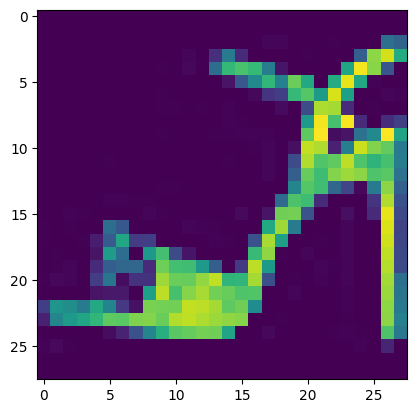

In [13]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

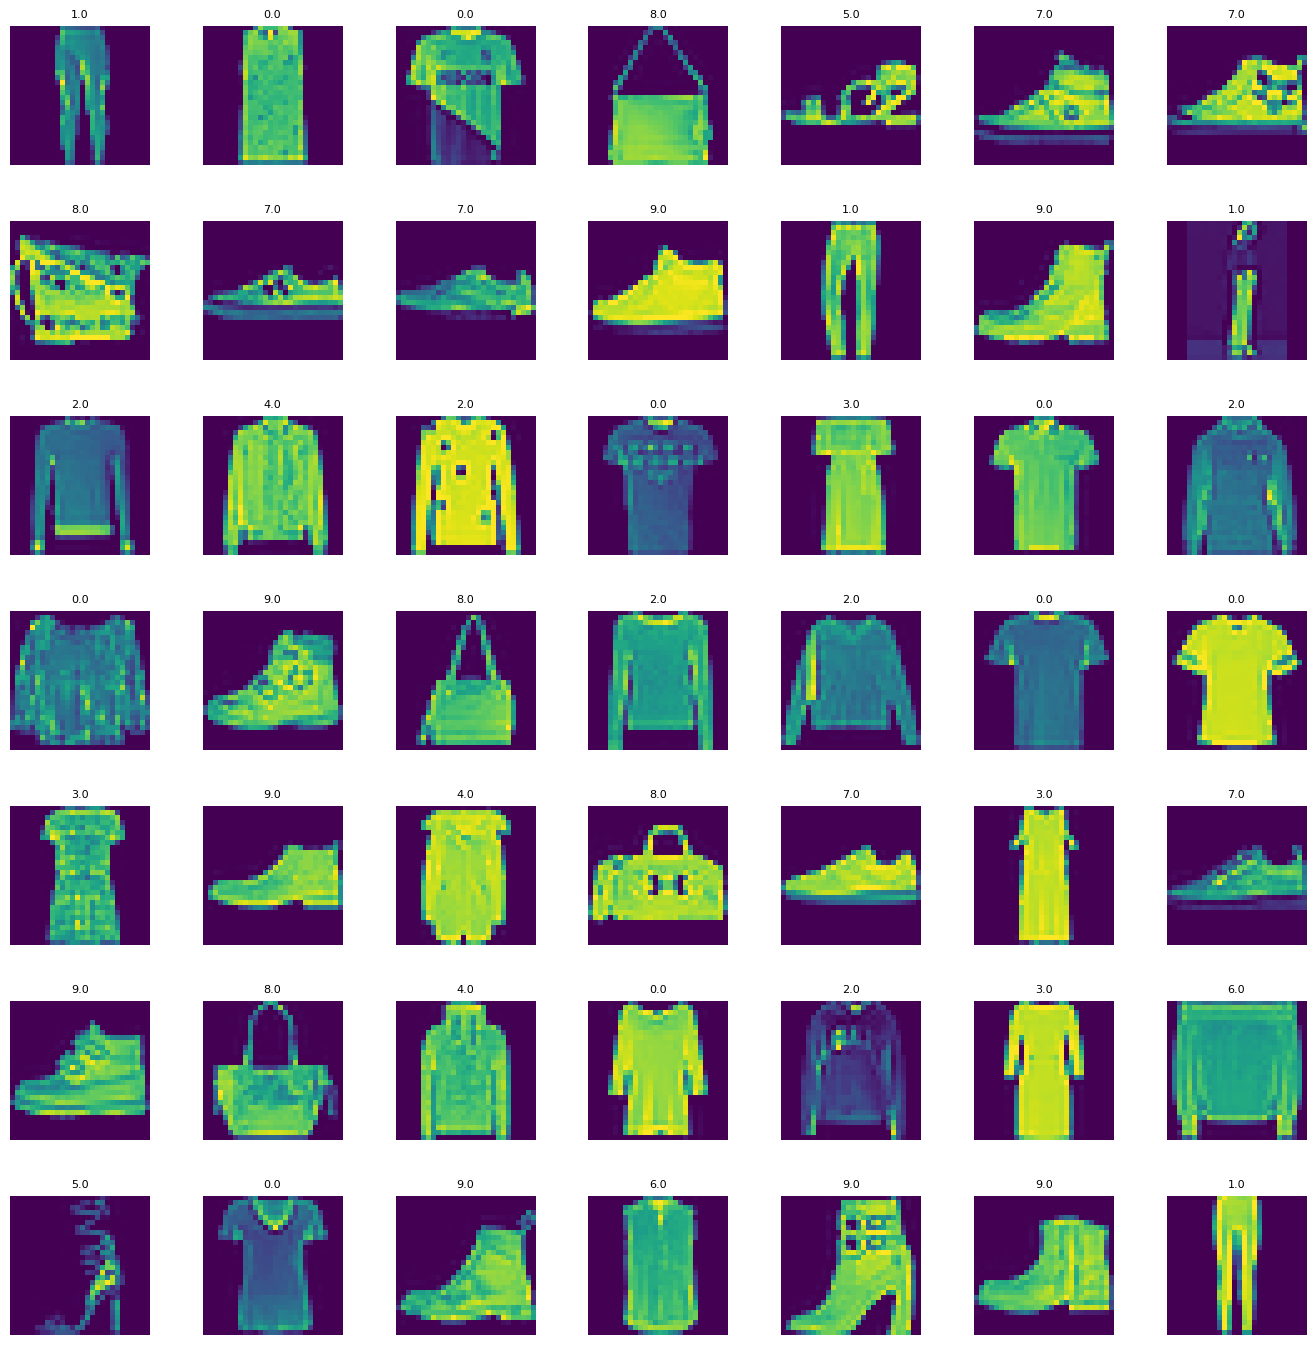

In [14]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [15]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [17]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [18]:
X_train.shape

(48000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_validate.shape

(12000, 28, 28, 1)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

In [23]:
epochs = 200

In [24]:
cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
94/94 [==============================] - 2s 15ms/step - loss: 1.4493 - accuracy: 0.5219 - val_loss: 0.8132 - val_accuracy: 0.7213
Epoch 2/200
94/94 [==============================] - 1s 14ms/step - loss: 0.7107 - accuracy: 0.7437 - val_loss: 0.6488 - val_accuracy: 0.7609
Epoch 3/200
94/94 [==============================] - 1s 14ms/step - loss: 0.6089 - accuracy: 0.7766 - val_loss: 0.5833 - val_accuracy: 0.7877
Epoch 4/200
94/94 [==============================] - 1s 14ms/step - loss: 0.5605 - accuracy: 0.7949 - val_loss: 0.5450 - val_accuracy: 0.8042
Epoch 5/200
94/94 [==============================] - 1s 16ms/step - loss: 0.5272 - accuracy: 0.8078 - val_loss: 0.5216 - val_accuracy: 0.8118
Epoch 6/200
94/94 [==============================] - 1s 15ms/step - loss: 0.5071 - accuracy: 0.8146 - val_loss: 0.4996 - val_accuracy: 0.8190
Epoch 7/200
94/94 [==============================] - 1s 13ms/step - loss: 0.4866 - accuracy: 0.8224 - val_loss: 0.4831 - val_accuracy: 0.8251
Epoch 

94/94 [==============================] - 1s 14ms/step - loss: 0.3359 - accuracy: 0.8767 - val_loss: 0.3727 - val_accuracy: 0.8623
Epoch 59/200
94/94 [==============================] - 1s 15ms/step - loss: 0.3348 - accuracy: 0.8769 - val_loss: 0.3671 - val_accuracy: 0.8675
Epoch 60/200
94/94 [==============================] - 1s 15ms/step - loss: 0.3352 - accuracy: 0.8783 - val_loss: 0.3755 - val_accuracy: 0.8612
Epoch 61/200
94/94 [==============================] - 1s 15ms/step - loss: 0.3345 - accuracy: 0.8783 - val_loss: 0.3720 - val_accuracy: 0.8643
Epoch 62/200
94/94 [==============================] - 2s 18ms/step - loss: 0.3329 - accuracy: 0.8786 - val_loss: 0.3696 - val_accuracy: 0.8658
Epoch 63/200
94/94 [==============================] - 1s 16ms/step - loss: 0.3317 - accuracy: 0.8790 - val_loss: 0.3661 - val_accuracy: 0.8664
Epoch 64/200
94/94 [==============================] - 1s 15ms/step - loss: 0.3309 - accuracy: 0.8794 - val_loss: 0.3648 - val_accuracy: 0.8681
Epoch 65/200

94/94 [==============================] - 2s 16ms/step - loss: 0.2961 - accuracy: 0.8916 - val_loss: 0.3626 - val_accuracy: 0.8703
Epoch 116/200
94/94 [==============================] - 1s 14ms/step - loss: 0.2956 - accuracy: 0.8913 - val_loss: 0.3557 - val_accuracy: 0.8700
Epoch 117/200
94/94 [==============================] - 1s 14ms/step - loss: 0.2932 - accuracy: 0.8927 - val_loss: 0.3569 - val_accuracy: 0.8731
Epoch 118/200
94/94 [==============================] - 2s 17ms/step - loss: 0.2935 - accuracy: 0.8929 - val_loss: 0.3556 - val_accuracy: 0.8722
Epoch 119/200
94/94 [==============================] - 1s 16ms/step - loss: 0.2939 - accuracy: 0.8925 - val_loss: 0.3647 - val_accuracy: 0.8664
Epoch 120/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2938 - accuracy: 0.8921 - val_loss: 0.3584 - val_accuracy: 0.8692
Epoch 121/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2936 - accuracy: 0.8924 - val_loss: 0.3590 - val_accuracy: 0.8710
Epoch 

Epoch 172/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2687 - accuracy: 0.9004 - val_loss: 0.3562 - val_accuracy: 0.8741
Epoch 173/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2694 - accuracy: 0.9013 - val_loss: 0.3615 - val_accuracy: 0.8716
Epoch 174/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2678 - accuracy: 0.9023 - val_loss: 0.3627 - val_accuracy: 0.8720
Epoch 175/200
94/94 [==============================] - 1s 15ms/step - loss: 0.2657 - accuracy: 0.9040 - val_loss: 0.3618 - val_accuracy: 0.8748
Epoch 176/200
94/94 [==============================] - 2s 17ms/step - loss: 0.2660 - accuracy: 0.9034 - val_loss: 0.3566 - val_accuracy: 0.8732
Epoch 177/200
94/94 [==============================] - 1s 16ms/step - loss: 0.2657 - accuracy: 0.9022 - val_loss: 0.3560 - val_accuracy: 0.8740
Epoch 178/200
94/94 [==============================] - 1s 16ms/step - loss: 0.2655 - accuracy: 0.9024 - val_loss: 0.3765 - val_accuracy:

In [25]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8732
Test Accuracy : 0.873


In [26]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)

313/313 [==============================] - 1s 2ms/step


In [27]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

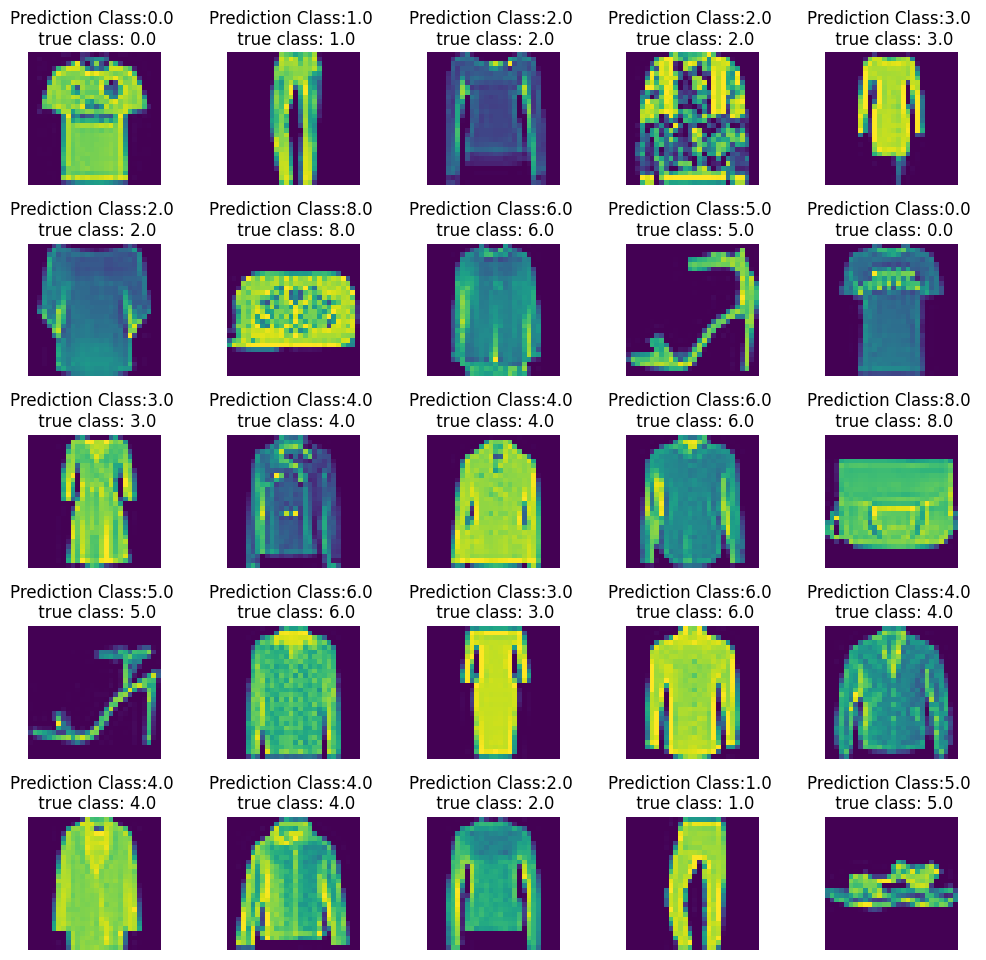

In [28]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [29]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.78      0.88      0.82      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.80      0.79      0.80      1000
     Class 3       0.90      0.89      0.89      1000
     Class 4       0.80      0.81      0.81      1000
     Class 5       0.97      0.93      0.95      1000
     Class 6       0.68      0.60      0.64      1000
     Class 7       0.91      0.93      0.92      1000
     Class 8       0.97      0.96      0.97      1000
     Class 9       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

